[1256. 【软件认证】基站信号地图](https://oj.rnd.huawei.com/problems/1256/details)

视一片区域为一个 rows * cols 的矩阵（行列编号皆从 1 开始），初始有一批基站分布在某些单元格内（位置无重复）。现对这片区域进行改造，涉及两种操作：
• add：在单元格[row,col]中添加一个基站，若该单元格已经存在基站，则不做任何动作。
• delete：清除单元格[row,col]及周边范围（上、下、左、右、对角的相邻单元格）中的基站。

假设每个基站的信号覆盖范围为上、下、左、右、对角的相邻单元格；每存在一个基站，覆盖范围内的每个单元格的信号强度增加 1 。

改造完成后，请统计最终矩阵各单元格（不含基站位置）的信号强度之和。

解答要求
时间限制：1000ms, 内存限制：256MB
输入
首行两个整数rows cols，表示矩阵的行数和列数，取值范围均为[1,100]。
第二行是一个整数 baseStationCnt，表示初始基站的个数，取值范围[0,100];
接下来 baseStationCnt 行，每行输入一个基站的位置，格式为row col，row的取值范围 [1,rows]，col的取值范围 [1,cols]；输入保证初始基站位置无重复。
然后一行是一个整数 cmdCnt，表示改造操作的个数，取值范围：[0,100]。
接下来 cmdCnt 行，每行一个操作，格式为操作 row col，操作仅为add或delete, row的取值范围 [1,rows]，col的取值范围 [1,cols]。
输出
一个整数，表示最终矩阵各单元格（不含基站位置）的信号强度之和。
```
样例
输入样例 1 复制

4 6
3
2 2
3 3
4 4
3
delete 4 3
add 1 2
delete 2 5
输出样例 1

11
提示样例 1
如下图所示：
```
- 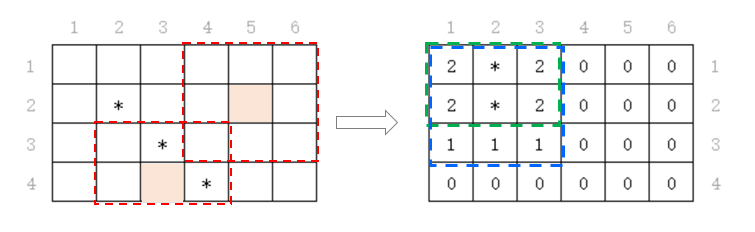

```
左边矩阵表示初始基站的分布（*表示基站）

delete 4 3 操作：清除单元格[4,3]周边范围内的两个基站
add 1 2 操作：在单元格[1,2]中添加基站
delete 2 5 操作：单元格[2,5]周边范围内没有基站，因此该操作不改变矩阵内的基站。
最后存在2个基站，如右边矩阵所示：绿框表示基站[1,2]的信号覆盖范围，蓝框表示基站[2,2]的信号覆盖范围。 最终矩阵每个单元格（不含基站位置）的信号强度为图中数字，和为11。


输入样例 2 复制

1 1
0
0
输出样例 2

0
提示样例 2
```

In [133]:
from typing import List
import copy


class Solution:
    def __init__(self):
        self.signals = []
        self.matrix = []

    def get_matrix_sum(self, rows: int, cols: int, base_stations: List[List[int]], commands: List[tuple]) -> int:
        # 构造出两个矩阵，stations记录矩阵
        self.signals = [[0] * (cols + 3) for _ in range(rows + 3)]
        self.matrix = copy.deepcopy(self.signals)
        # 第一步 依据命令对基站进行更新，基站数量不多，循环更新即可
        for command in commands:
            func, location = command
            if func == 'add' and location not in base_stations:
                base_stations.append(location)
            elif func == 'delete':
                for i in [-1, 0, 1]:
                    for j in [-1, 0, 1]:
                        temp = [location[0] + i, location[1] + j]
                        if temp in base_stations:
                            base_stations.pop(base_stations.index(temp))
        # 更新差分矩阵
        for row, col in base_stations:
            self.matrix[row - 1][col - 1] += 1
            self.matrix[row - 1][col + 2] -= 1
            self.matrix[row + 2][col - 1] -= 1
            self.matrix[row + 2][col + 2] += 1
        for i in range(0, rows + 2):
            for j in range(0, cols + 2):
                self.signals[i][j] = self.signals[i - 1][j] + self.signals[i][j - 1] - self.signals[i - 1][j - 1] + \
                                     self.matrix[i][j]
        for row, col in base_stations:
            self.signals[row][col] = 0
        return sum([sum(x[1:cols + 1]) for x in self.signals][1:rows + 1])


In [134]:
rows = 20
cols = 40
base_stations = [[2, 2],[3,3],[4,4]]
commands = [('delete', [4, 3]), ('add', [1, 2]),('delete', [2, 5])]
# commands = []

In [135]:
sol = Solution()
sol.get_matrix_sum(rows,cols,base_stations,commands)

[[2, 2], [1, 2]]
---------------------
[0, 1, 0, 0, -1, 0, 0, 0, 0]
[0, 1, 0, 0, -1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, -1, 0, 0, 1, 0, 0, 0, 0]
[0, -1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
--------------------
[0, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 2, 0, 2, 0, 0, 0, 0, 0]
[0, 2, 0, 2, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]


11